# Hurricans and Typhoons Classification.

## Objectives:
1. Clean the data.
2. Statistical Analysis of data.
 - *Find Top ten hurricanes by frequency.*
 - *Find frequency of hurricanes by month.*
 - *Find frequency of hurricanes by year.*
 - *Find frequency of hurricanes by category.*
3. Classification into Hurricanes or Typhoons using Logistic Regression, Decision Tree, Random Forrest , Naive Bayes and SVM.
 - *Perform Feature selection using Random Forest.* 
 - *Compare the prediction by Decision Tree Model performance using all the features and top five features.* 
 - *Find the prediction accuracy of Random Forest Model model using the top five features.* 
 - *Compare the prediction by Naive Bayes Model performance using all the features and top five features.* 
 - *Find the prediction accuracy of SVM model using the top five features.* 
 - *Show which model has performed the best.* 

## Clean the data.

In [ ]:
# Ignore Warnings.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Status can be the following types:
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# HU – Tropical cyclone of hurricane intensity (> 64 knots)
# EX – Extratropical cyclone (of any intensity)
# SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
# SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
# LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
# WV – Tropical Wave (of any intensity)
# DB – Disturbance (of any intensity)

In [1]:

# Import the libraries.

# Import pandas.
import pandas as pd
# Import numpy.
import numpy as np
# Import matplotlib.
import matplotlib.pyplot as plt
# Import seaborn.
import seaborn as sns
# Import regular expression.
import re
# import datetime.
import datetime as dt
# Import the data.
df = pd.read_csv('pacific.csv')
# Convert date column as datetime.
df['Date'] = pd.to_datetime(df['Date'] , format= '%Y%m%d')

# I want to create columns Latitude Hemisphere and Longitude Hemisphere with code 0 = N , 1 = S & 0 = E , 1 = W.
def hemisphere(coord):
        hem = re.findall(r'[NSWE]' , coord)[0]
        if hem == 'N' or hem == 'E':
            return 0
        else:
            return 1

# Creating the column Latitude_Hemisphere.    
df['Latitude_Hemisphere'] = df['Latitude'].apply(hemisphere)
df['Longitude_Hemisphere'] = df['Longitude'].apply(hemisphere)
df['Latitude_Hemisphere'] = df['Latitude_Hemisphere'].astype('category')
df['Longitude_Hemisphere'] = df['Longitude_Hemisphere'].astype('category')

# Convert the latitude and longitude Column to numeric type.
df['Latitude'] =  df['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
df['Longitude'] =   df['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

# The missing values are given by -999. So , we need to fill them appropriately.

# Show the count of missing values and fill them with mean.
for column in df.columns:
    missing_cnt = df[column][df[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
#         print('in ' , column)
        mean = round(df[column][df[column] != -999 ].mean())
#         print("mean",mean)
        index = df.loc[df[column] == -999 , column].index
#         print("index" , index )
        df.loc[df[column] == -999 , column] = mean
#         print(df.loc[index , column])
        
# Restructure the dataframe for visibility and remove columns ID and Event.        
df =  df[['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Latitude_Hemisphere' , 
       'Longitude', 'Longitude_Hemisphere' ,'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']]

# Change all time to format HHMM.
df['Time'] = df['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t
# Apply the function.
df['Time'] = df['Time'].apply(hhmm)

# Convert the column into Datetime.
df['Time'] = pd.to_datetime(df['Time'] , format='%H%M').dt.time


# Convert the status column to categorical.
df['Status'] = df['Status'].astype('category')

data = df.drop(columns = ['ID' , 'Event'])

Missing Values in column ID =  0
Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Event =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  12804
Missing Values in column Low Wind NE =  19750
Missing Values in column Low Wind SE =  19750
Missing Values in column Low Wind SW =  19750
Missing Values in column Low Wind NW =  19750
Missing Values in column Moderate Wind NE =  19750
Missing Values in column Moderate Wind SE =  19750
Missing Values in column Moderate Wind SW =  19750
Missing Values in column Moderate Wind NW =  19750
Missing Values in column High Wind NE =  19750
Missing Values in column High Wind SE =  19750
Missing Values in column High Wind SW =  19750
Missing Values in column High Wind NW =  19750
Missing Values in column Latitude_Hemisp

## Statististical Analysis of the data.

In [2]:
# Display the data.
data.head(10)

,Name,Date,Time,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,UNNAMED,1949-06-11,00:00:00,TS,20.2,0,106.3,1,45,995,...,27,35,13,11,9,11,5,4,3,5
1,UNNAMED,1949-06-11,06:00:00,TS,20.2,0,106.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
2,UNNAMED,1949-06-11,12:00:00,TS,20.2,0,106.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
3,UNNAMED,1949-06-11,18:00:00,TS,20.3,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
4,UNNAMED,1949-06-12,00:00:00,TS,20.4,0,108.6,1,45,995,...,27,35,13,11,9,11,5,4,3,5
5,UNNAMED,1949-06-12,06:00:00,TS,20.5,0,109.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
6,UNNAMED,1949-06-12,12:00:00,TS,20.6,0,110.2,1,45,995,...,27,35,13,11,9,11,5,4,3,5
7,UNNAMED,1949-06-17,12:00:00,TS,14.1,0,107.0,1,45,995,...,27,35,13,11,9,11,5,4,3,5
8,UNNAMED,1949-06-17,18:00:00,TS,14.6,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
9,UNNAMED,1949-06-18,00:00:00,TS,15.0,0,108.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5


## Top ten cyclones which occured the maximum number of times.

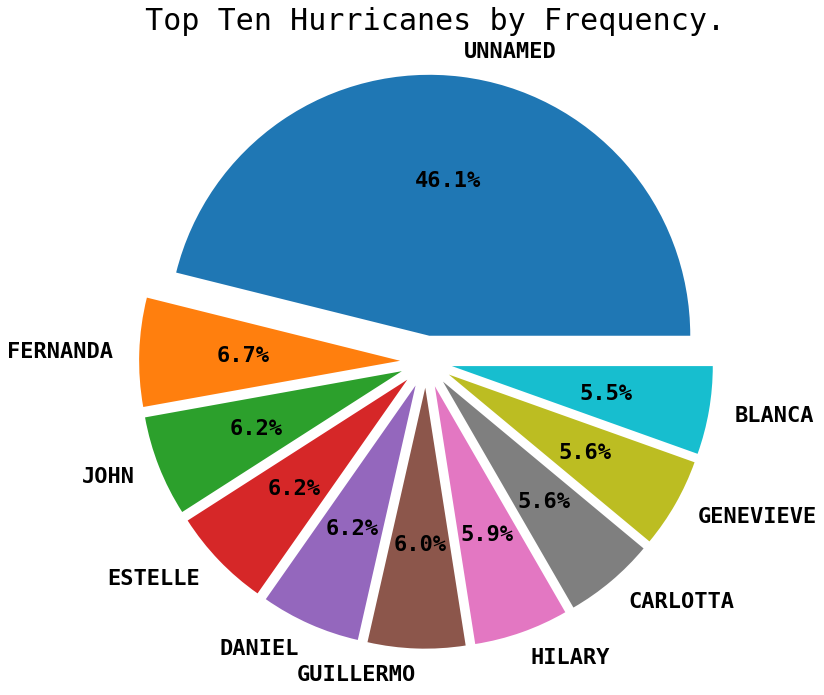

In [3]:
# Find the top ten cyclones which have occured the maximum number of times.
lst = [x.strip() for x in data.groupby('Name').count().sort_values(by = 'Date' , ascending = False).index[:10]]
val = data.groupby('Name').count().sort_values(by = 'Date' , ascending = False)[:10]['Date'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(10)])
plt.title(' Top Ten Hurricanes by Frequency.' , fontsize = 30)
plt.show()

## Frequency of Hurricanes by Month.

Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

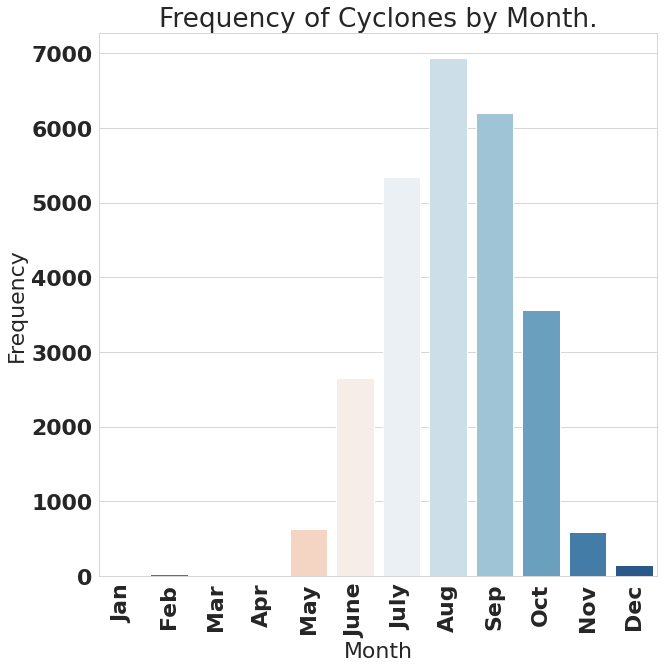

In [4]:
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Year'] = data['Date'].apply(lambda x: x.year)
mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = data.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency')
plt.title('Frequency of Cyclones by Month.')

## Year Wise Frequency of Hurricanes.

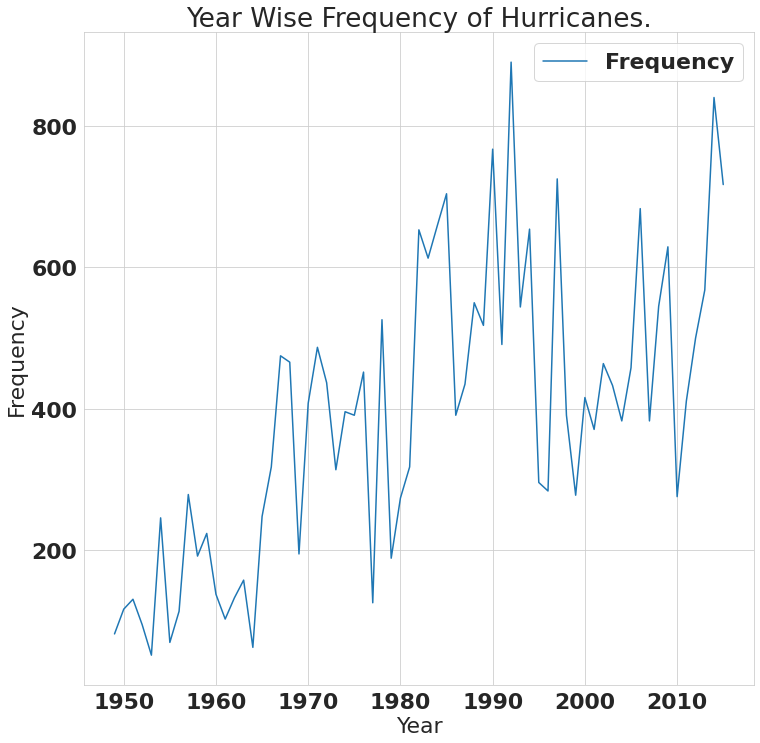

In [5]:
# Year-Wise Frequency of Hurricanes.
temp = data.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (12,12))
sns.lineplot(x = temp.index , y = 'Month' , data = temp , label = 'Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Frequency of Hurricanes.')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


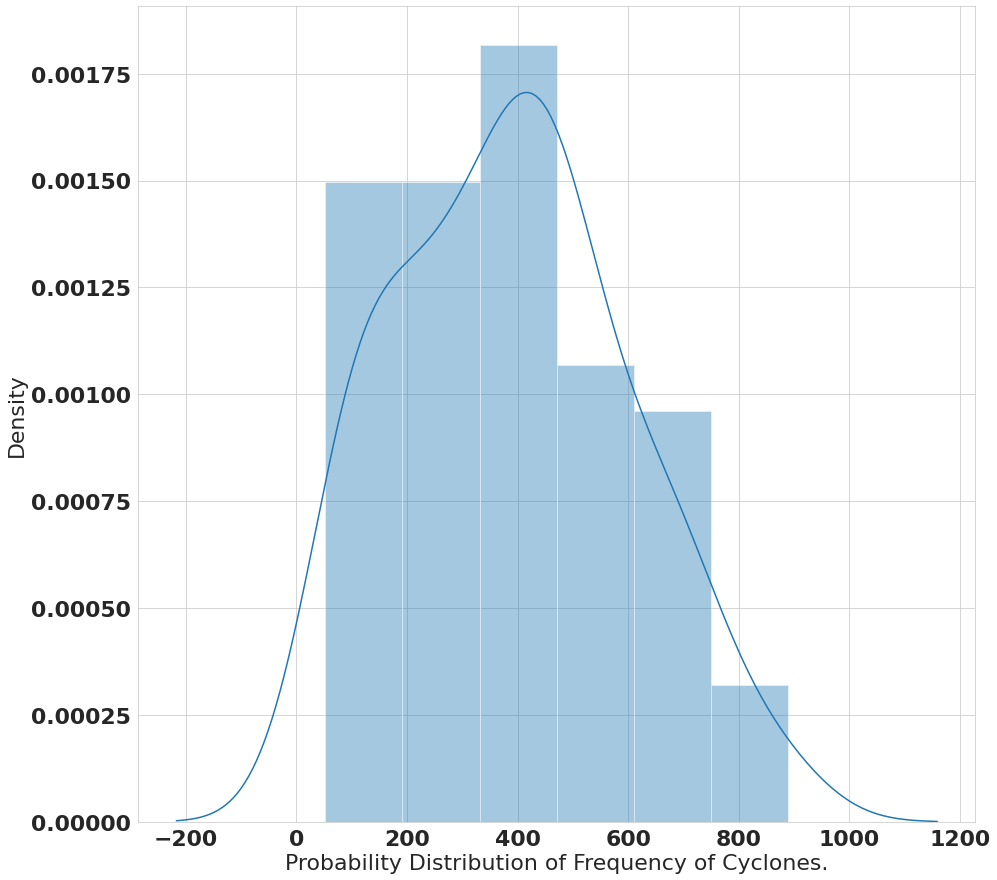

In [6]:
# Probability Distribution Function of Frequency.
temp = data.groupby('Year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(15,15))
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')

## Frequency of Cyclones by category.

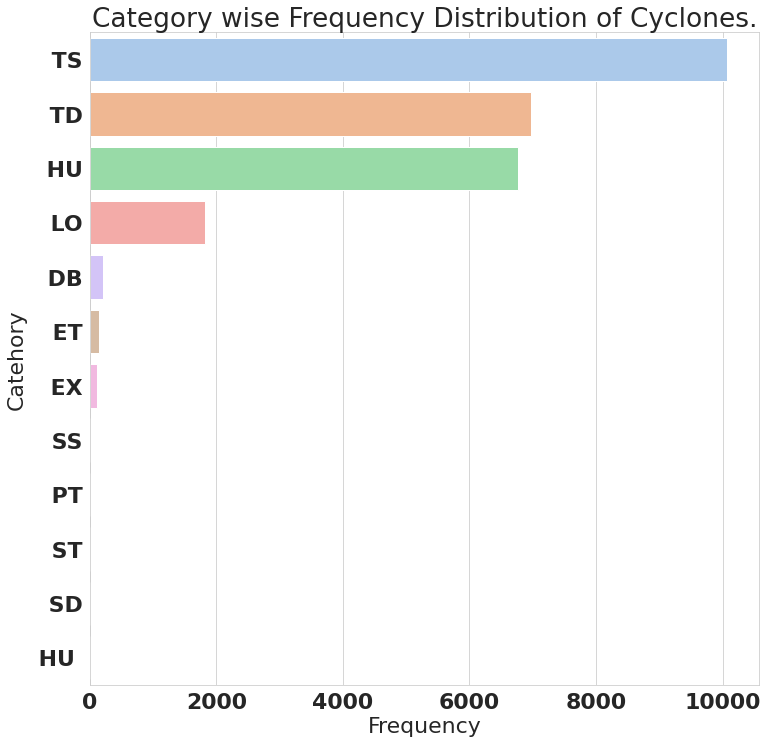

In [7]:
## Frequency of Cyclones by Category
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# HU – Tropical cyclone of hurricane intensity (> 64 knots)
# EX – Extratropical cyclone (of any intensity)
# SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
# SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
# LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
# WV – Tropical Wave (of any intensity)
# DB – Disturbance (of any intensity)
temp = data.groupby('Status').count().sort_values(by = 'Date' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
sns.barplot(y = list(temp.index) , x = 'Date' , data = temp, palette= 'pastel' )
plt.xlabel('Frequency')
plt.ylabel('Catehory')
plt.title('Category wise Frequency Distribution of Cyclones.')
plt.show()


 # Classification model. 

## 1. Decision Tree.

In [19]:
# Import Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

# Import train-test split.
from sklearn.model_selection import train_test_split

# Import accuracy Score.
from sklearn.metrics import accuracy_score

#Import Recall Score.
from sklearn.metrics import recall_score 

#Import Precision Score.
from sklearn.metrics import precision_score 

# Form the model.
dt = DecisionTreeClassifier(min_samples_leaf=50 , criterion='entropy')
#get rid of warnings
from warnings import filterwarnings

# Set the dependent and independent variables.
x_train = data[['Latitude', 'Latitude_Hemisphere',
       'Longitude', 'Longitude_Hemisphere', 'Maximum Wind', 'Minimum Pressure',
       'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
       'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
       'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW',
       'High Wind NW' , 'Month' , 'Year']]
y_train = data['Status']


# Perform the Kfold validation.

# Import the KFold library.
from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

dt_scores = []
dt_recall_scores = []
dt_precision_scores = []
for tr , ts in kf.split(x_train):
    xtr = x_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_train.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts) 
    dt_scores.append(accuracy_score(yts, y_pred)) 
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))
# dt.fit(x_train, y_train)
# y_pred = dt.predict(x_test)
# accuracy_score(y_test, y_pred)
dt_scr = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('Accuracy score for Decision Tree is :' , dt_scr['accuracy'])
print('Recall score for Decision Tree is :' , dt_scr['recall'])
print('Precision score for Decision Tree is :' , dt_scr['precision'])



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Accuracy score for Decision Tree is : 0.9651068271145011
Recall score for Decision Tree is : 0.9651068271145011
Precision score for Decision Tree is : 0.9639969870825983


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Random Forest.

In [20]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
#get rid of warnings
from warnings import filterwarnings

# First I want to determine the important features.
rf = RandomForestClassifier(oob_score=True , n_estimators=1000)
rf.fit(x_train , y_train)
features = pd.Series(rf.feature_importances_ , index= x_train.columns).sort_values(ascending=False)
features

Maximum Wind            0.633247
Minimum Pressure        0.109585
Latitude                0.039008
Year                    0.038535
Longitude               0.036820
Low Wind NE             0.026930
Low Wind NW             0.019571
Low Wind SE             0.015248
High Wind NE            0.013758
Low Wind SW             0.012292
Month                   0.011552
High Wind SE            0.010547
High Wind NW            0.008630
High Wind SW            0.005779
Moderate Wind SE        0.004725
Moderate Wind NE        0.004553
Moderate Wind SW        0.003509
Moderate Wind NW        0.003343
Longitude_Hemisphere    0.002371
Latitude_Hemisphere     0.000000
dtype: float64

## Creating a decision tree for top ten most important features.

In [21]:
#get rid of warnings
from warnings import filterwarnings


# Top ten most important features.
features.index[:5]

Index(['Maximum Wind', 'Minimum Pressure', 'Latitude', 'Year', 'Longitude'], dtype='object')

In [22]:

#get rid of warnings
from warnings import filterwarnings

# Set the dependent and independent variables.
x_trainf = data[features.index[:5]]
y_train = data['Status']

# Perform the Kfold validation.

# Import the KFold library.
from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

dt_scores = []
dt_recall_scores = []
dt_precision_scores = []
for tr , ts in kf.split(x_trainf):
    xtr = x_trainf.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_trainf.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts) 
    dt_scores.append(accuracy_score(yts, y_pred)) 
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))
# dt.fit(x_train, y_train)
# y_pred = dt.predict(x_test)
# accuracy_score(y_test, y_pred)
dt_scr5 = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('Accuracy score for Decision Tree is :' , dt_scr['accuracy'])
print('Recall score for Decision Tree is :' , dt_scr['recall'])
print('Precision score for Decision Tree is :' , dt_scr['precision'])

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Accuracy score for Decision Tree is : 0.9651068271145011
Recall score for Decision Tree is : 0.9651068271145011
Precision score for Decision Tree is : 0.9639969870825983


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## As we can see the Top five features('Maximum Wind', 'Minimum Pressure', 'Latitude', 'Year', 'Longitude') give the same accuracy as when we get choosing all the features.

## 2 . Random Forest

In [23]:
#get rid of warnings
from warnings import filterwarnings

# Here instead of cross validation we will be using oob score as a measure of accuracy.
# I will hyper tuning the parameter: No of Trees.

trees  = [10, 20 , 50, 100,200,500,1000,1200]
maxn_five = {}
maxn = {}
for i in trees:
    rf = RandomForestClassifier(n_estimators=i , oob_score=True)
    rf.fit(x_trainf , y_train)
    print('Obb Score for {x} trees: and taking top five features '.format(x = i) , rf.oob_score_)
    maxn_five[i] = rf.oob_score_
    rf.fit(x_trainf , y_train)
    print('Obb Score for {x} trees: and taking all the features '.format(x = i) , rf.oob_score_)
    maxn[i] = rf.oob_score_

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Obb Score for 10 trees: and taking top five features  0.9680146918161993


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Obb Score for 10 trees: and taking all the features  0.9659103952251598


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Obb Score for 20 trees: and taking top five features  0.9803343918582852


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Obb Score for 20 trees: and taking all the features  0.9801430921681907
Obb Score for 50 trees: and taking top five features  0.9827830278914949
Obb Score for 50 trees: and taking all the features  0.9819795691930979
Obb Score for 100 trees: and taking top five features  0.9828595477675326
Obb Score for 100 trees: and taking all the features  0.983089107395646
Obb Score for 200 trees: and taking top five features  0.9829743275815893
Obb Score for 200 trees: and taking all the features  0.9831656272716838
Obb Score for 500 trees: and taking top five features  0.9828595477675326
Obb Score for 500 trees: and taking all the features  0.9830125875196082
Obb Score for 1000 trees: and taking top five features  0.9832804070857405
Obb Score for 1000 trees: and taking all the features  0.9832038872097028
Obb Score for 1200 trees: and taking top five features  0.9833569269617783
Obb Score for 1200 trees: and taking all the features  0.9833569269617783


In [24]:
#get rid of warnings
from warnings import filterwarnings

# Split the data into training and testing.
x_trains , x_tests , y_trains, y_tests  = train_test_split(x_trainf, y_train, test_size=0.33, random_state=42)
# Set n to the feature of maximum oob score.
n = 0
for i in maxn_five:
    if max(maxn_five.values()) == maxn_five[i]:
        n= i
# Set n_estimators to n.
rf = RandomForestClassifier(oob_score=True , n_estimators=n)
rf.fit(x_trains , y_trains)
y_pred_rf = rf.predict(x_tests[features.index[:5]])
scores_rf = {'accuracy': accuracy_score(y_tests , y_pred_rf) ,'recall' : recall_score(y_tests , y_pred_rf , average='weighted') ,'precision' : precision_score(y_tests , y_pred_rf , average='weighted') }
print('Scores for Random Forest with n = ' , n , ' and using features ',  features.index[:5] , ' are : ')
print('Accuracy: ' , scores_rf['accuracy'])
print('Recall: ' , scores_rf['recall'])
print('Precision: ' , scores_rf['precision'])

# n_All = 0
# for i in maxn:
#     if max(maxn.values()) == maxn[i]:
#         n_All= i
# # Set n_estimators to n.
# rf = RandomForestClassifier(oob_score=True , n_estimators=n_All)
# rf.fit(x_train , y_train)
# y_pred_rf_all = rf.predict(x_test)
# scores_rf_all = {'accuracy': accuracy_score(y_test , y_pred_rf) ,'recall' : recall_score(y_test , y_pred_rf , average='weighted') ,'precision' : precision_score(y_test , y_pred_rf , average='weighted') }
# print('Scores for Random Forest with n = ' , n_All , ' and using all features ' , ' are : ')
# print('Accuracy: ' , scores_rf_all['accuracy'])
# print('Recall: ' , scores_rf_all['recall'])
# print('Precision: ' , scores_rf_all['precision'])

Scores for Random Forest with n =  1200  and using features  Index(['Maximum Wind', 'Minimum Pressure', 'Latitude', 'Year', 'Longitude'], dtype='object')  are : 
Accuracy:  0.9808717829816833
Recall:  0.9808717829816833
Precision:  0.9803403237679327


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. Naive Bayes Algorithm.

In [25]:
#get rid of warnings
from warnings import filterwarnings

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb5 = GaussianNB()
acc_s = [] 
rcl_s = [] 
ps_scr = []
acc_s_5 = [] 
rcl_s_5 = [] 
ps_scr_5 = []
for tr, ts in kf.split(x_train):
    xtr = x_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_train.loc[ts]
    yts = y_train.loc[ts]
    xtr5 = x_trainf.loc[tr]
    xts5 = x_trainf.loc[ts]

    
    # Accuracy , Precision and recall with all features.
   
    nb.fit(xtr , ytr)
    y_nb_pred = nb.predict(xts)
    acc_s.append(accuracy_score(yts , y_nb_pred))
    rcl_s.append(recall_score(yts , y_nb_pred , average = 'weighted'))
    ps_scr.append(precision_score(yts , y_nb_pred , average = 'weighted'))
    
#     Accuracy , Precision and recall with top five features.
    nb5.fit(xtr5 , ytr)
    y_nb5_pred = nb5.predict(xts5)
    acc_s_5.append(accuracy_score(yts , y_nb5_pred))
    rcl_s_5.append(recall_score(yts , y_nb5_pred , average = 'weighted'))
    ps_scr_5.append(precision_score(yts , y_nb5_pred , average = 'weighted'))
    
nb_scores = {'accuracy':np.mean(acc_s) , 'recall':np.mean(rcl_s) , 'precision':np.mean(ps_scr)}
nb5_scores = {'accuracy':np.mean(acc_s_5) , 'recall':np.mean(rcl_s_5) , 'precision':np.mean(ps_scr_5)}
print('Naive Bayes results for top five features for Accuracy ' , nb5_scores['accuracy'] , 'Recall: ' , nb5_scores['recall'], 'and Precision: ' , nb5_scores['precision'] )
print('Naive Bayes results for all features for Accuracy ' , nb_scores['accuracy'] , 'Recall: ' , nb_scores['recall'], 'and Precision: ' , nb_scores['precision'] )

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packag

Naive Bayes results for top five features for Accuracy  0.9267697472849982 Recall:  0.9267697472849982 and Precision:  0.9444534250577468
Naive Bayes results for all features for Accuracy  0.16114908360908659 Recall:  0.16114908360908659 and Precision:  0.7849567692891887


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.p

### We can see that the overall score with top five features is significantly greater than the overall score with all the features. Hence , we can see that feature selection is very important for Naive Bayes.

## 4. Support Vector Algorithm.

In [26]:
# Import SVM.
from sklearn import svm
#get rid of warnings
from warnings import filterwarnings

mdl5 = svm.SVC()
acc_s_5 = [] 
rcl_s_5 = [] 
ps_scr_5 = []

# Split the data into train and test.
xtr5, xts5 , ytr , yts = train_test_split(x_trainf , y_train , test_size = 0.25 , random_state = 42)

# Train the model.
mdl5.fit(xtr5 , ytr)
y_mdl5_pred = nb5.predict(xts5)
acc_s_5.append(accuracy_score(yts , y_mdl5_pred))
rcl_s_5.append(recall_score(yts , y_mdl5_pred , average = 'weighted'))
ps_scr_5.append(precision_score(yts , y_mdl5_pred , average = 'weighted'))

# for tr, ts in kf.split(x_train):
#     ytr = y_train.loc[tr]
#     yts = y_train.loc[ts]
#     xtr5 = x_trainf.loc[tr]
#     xts5 = x_trainf.loc[ts]

# #   Accuracy , Precision and recall with top five features.
#     mdl5.fit(xtr5 , ytr)
#     y_mdl5_pred = nb5.predict(xts5)
#     acc_s_5.append(accuracy_score(yts , y_mdl5_pred))
#     rcl_s_5.append(recall_score(yts , y_mdl5_pred , average = 'weighted'))
#     ps_scr_5.append(precision_score(yts , y_mdl5_pred , average = 'weighted'))
    
svm_scores = {'accuracy':np.mean(acc_s_5) , 'recall':np.mean(rcl_s_5) , 'precision':np.mean(ps_scr_5)}
print('SVM results for top five features for Accuracy ' , svm_scores['accuracy'] , 'Recall: ' , svm_scores['recall'], 'and Precision: ' , svm_scores['precision'] )


SVM results for top five features for Accuracy  0.9282325937260902 Recall:  0.9282325937260902 and Precision:  0.9464563272916006


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### We can see that the overall score with top five features is significantly greater than the overall score with all the features. Hence , we can see that feature selection is very important for SVM.

In [16]:
## Comparing the algorithms.
res = {'DecisionTree':dt_scr5['accuracy'] , 'RandomForest': scores_rf['accuracy'] , 'GaussianNB': nb5_scores['accuracy'] , 'SVM':svm_scores['accuracy']}
max_res = max(res.values())
max_index = ''
for i in res:
    if res[i] == max_res:
        max_index = i
print('The most effictive algorithm is :' , max_index , 'with accuracy: ' , res[max_index])        


The most effictive algorithm is : RandomForest with accuracy:  0.9808717829816833
